# Glass Identification Dataset

## LogisticRegression

In [125]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [126]:
#read dada
df = pd.read_csv('glass.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [127]:
header=[ 'Id_number','refractive_index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type_of_glass']

In [128]:
df.columns=header
df.head()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### PreProcessing

In [129]:
df.columns

Index(['Id_number', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum',
       'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [130]:
df.shape

(214, 11)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [132]:
df.describe()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [133]:
# Observations 
# 1] no null values
# 2] all values are continious except id column
# 3] data is skewed

In [134]:
df.dtypes

Id_number             int64
refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

In [135]:
df['Type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

#### Replacing 1,2,3 to 0 and  5,6,7 to 1 as state in problem statement

In [136]:
#replacing 1 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(1,0)

#replacing 2 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(2,0)

#replacing 3 to 0
df['Type_of_glass']=df['Type_of_glass'].replace(3,0)

#replacing 5 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(5,1)

#replacing 6 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(6,1)

#replacing 7 to 1
df['Type_of_glass']=df['Type_of_glass'].replace(7,1)

In [137]:
df['Type_of_glass'].unique()

array([0, 1], dtype=int64)

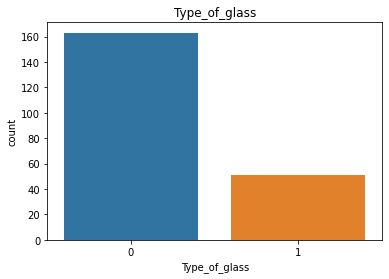

In [138]:
sns.countplot(x='Type_of_glass' , data=df)
plt.title('Type_of_glass')
plt.show()

In [139]:
glass=df['Type_of_glass'].value_counts()
glass

0    163
1     51
Name: Type_of_glass, dtype: int64

In [140]:
pcts = glass / glass.sum()*100
pcts

0    76.168224
1    23.831776
Name: Type_of_glass, dtype: float64

#### Seperating Feature & Label so to slove imblance by using SMOTE

In [141]:
# seperate label n feature
X=df.drop('Type_of_glass' , axis=1)
y=df.Type_of_glass

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [143]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 120, 1: 40})

In [144]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE

In [145]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 120, 1: 40})
the number of classes after fit:  Counter({0: 120, 1: 90})


In [146]:
df.head()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [147]:
#describe dataset
df.describe()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [148]:
# checking null values
df.isnull().sum()

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

### EDA and Visulization

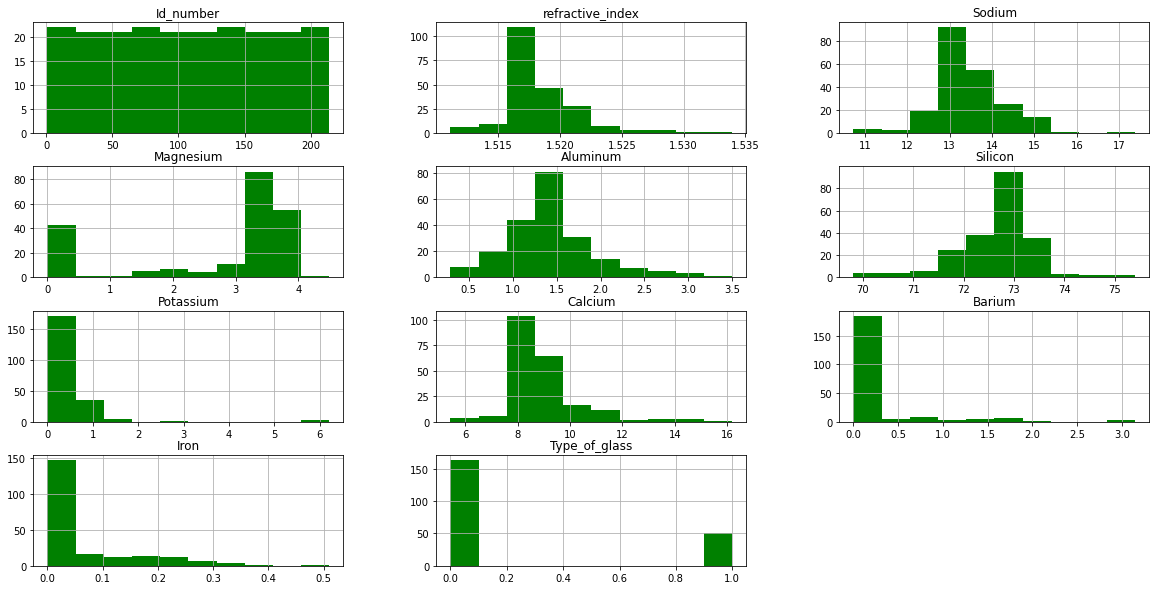

In [149]:
# analyzing the data
df.hist(color='g',figsize=(20,10),bins=10)
plt.show()

### Distribution Plot

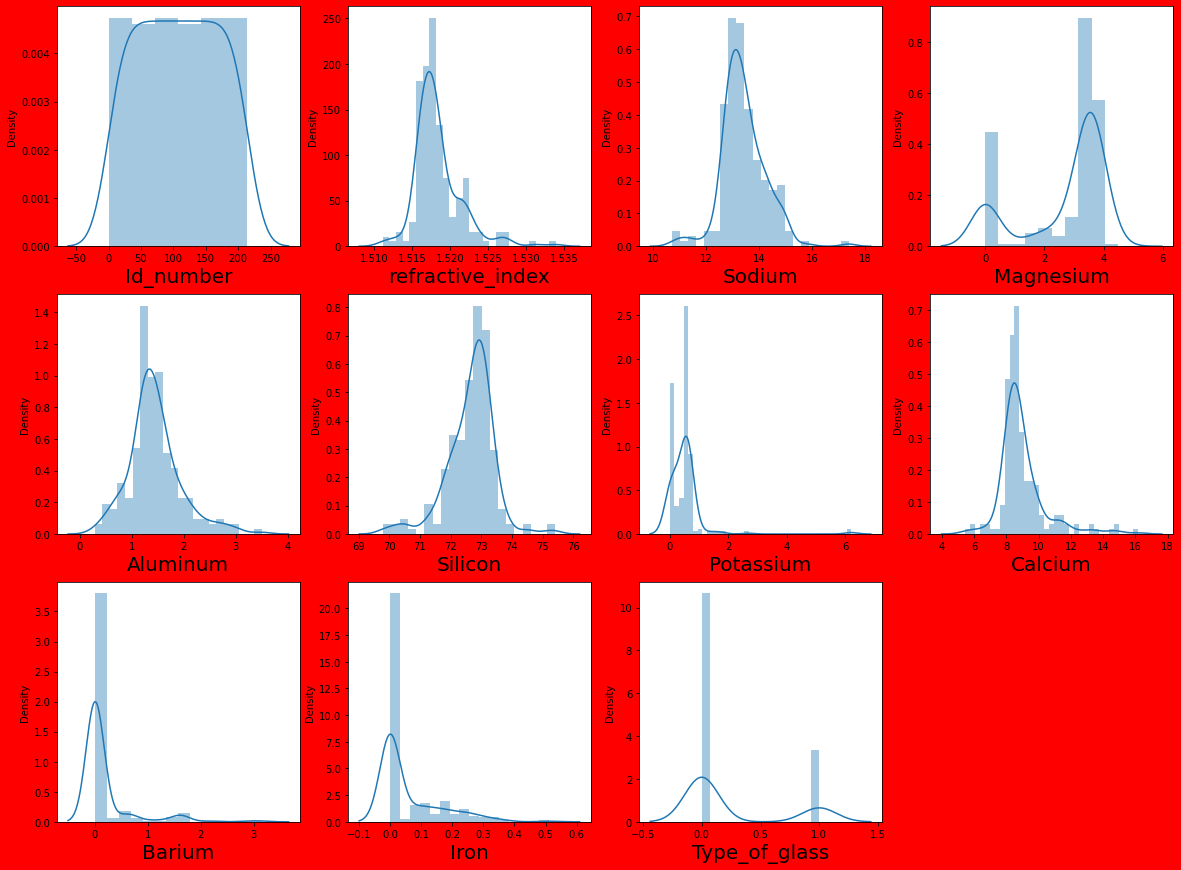

In [150]:
# seeeing dist plot how data is scttered
plt.figure(figsize=(20,15) , facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 20)
    plotnumber += 1
plt.show()

### Heat Map

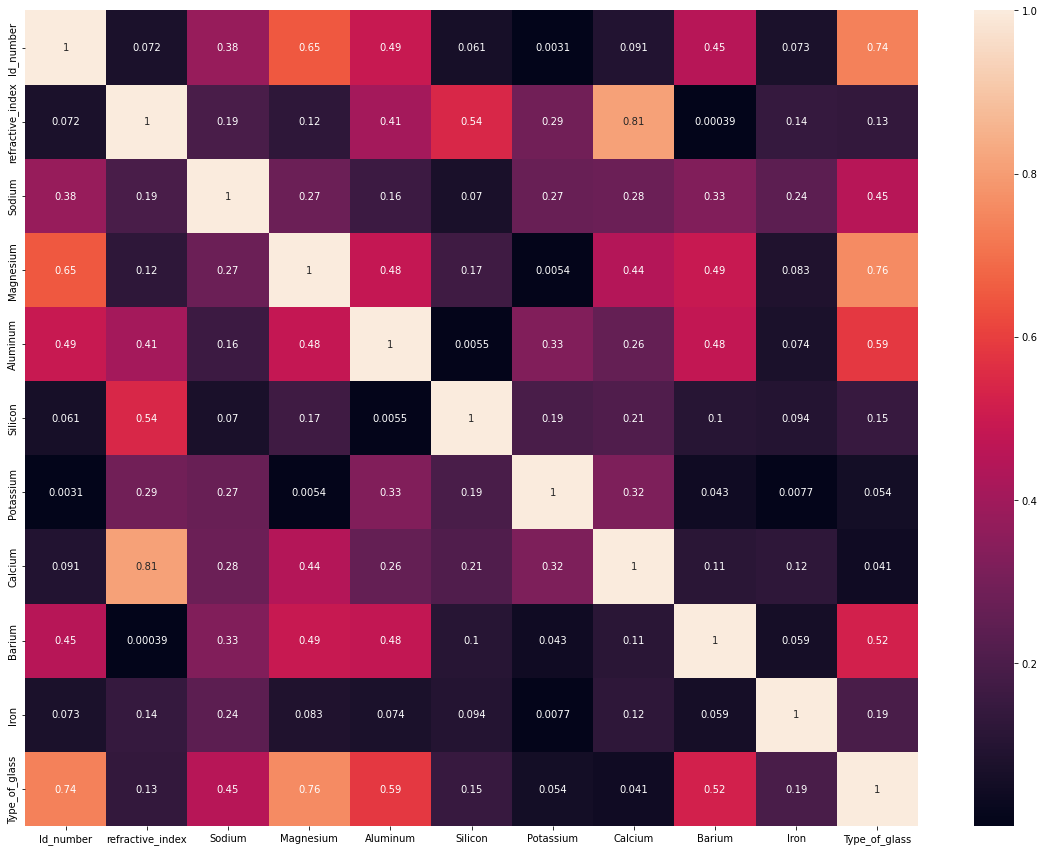

In [151]:
# find relationship between feature vs feature and feature vs label by using new technique that is heatmap

# we can use heatmap to see that problem has multicollinearity problem exist or not

df_corr = df.corr().abs() #this code will give coefficient of one variable vs all other feature (relationship will all)

plt.figure(figsize=(20,15))
sns.heatmap (df_corr , annot = True , annot_kws={'size' : 10}) # df_corr = graph , annot=number inside box , annot_kws=size of number inside box
plt.show()

#### 2nd proof to see there is relation between Calcium and Refractive Index

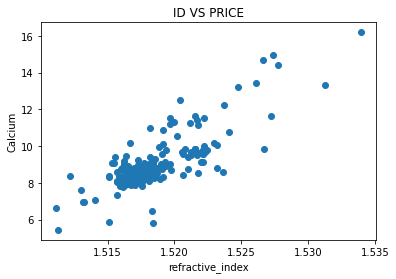

In [152]:
plt.scatter(df['refractive_index'],df['Calcium'])
plt.xlabel('refractive_index')
plt.ylabel('Calcium')
plt.title('ID VS PRICE')
plt.show()

### Box Plot to see Outliers

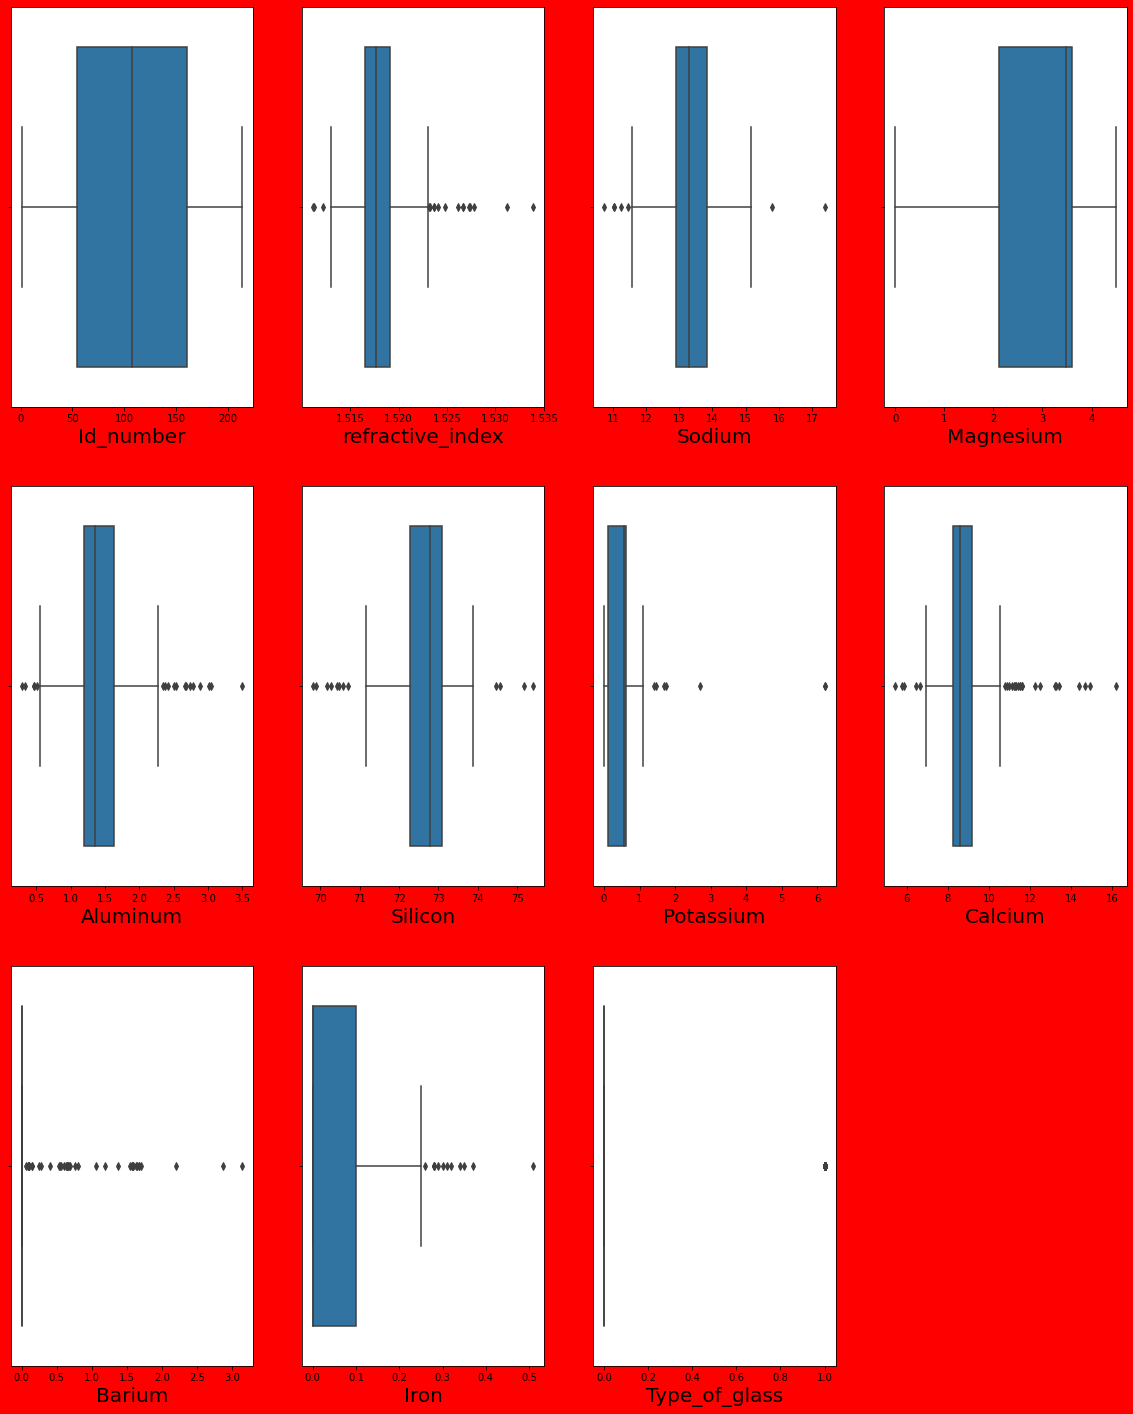

In [153]:
plt.figure(figsize=(20,25) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 12:
        plt.subplot (3,4,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### Removing Outliers by IQR Method

In [154]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

Id_number           106.500000
refractive_index      0.002635
Sodium                0.917500
Magnesium             1.485000
Aluminum              0.440000
Silicon               0.807500
Potassium             0.487500
Calcium               0.932500
Barium                0.000000
Iron                  0.100000
Type_of_glass         0.000000
dtype: float64

In [155]:
#validating outlier 
preg_high = (q3.refractive_index + (1.5*iqr.refractive_index))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['refractive_index']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
196,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
197,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
198,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [156]:
#validating outlier 
preg_high = (q3.Sodium + (1.5*iqr.Sodium))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Sodium']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
195,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
196,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
197,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [157]:
#validating outlier 
preg_high = (q3.Aluminum + (1.5*iqr.Aluminum))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Aluminum']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
181,207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,1
182,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
183,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
184,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [158]:
#validating outlier 
preg_high = (q3.Silicon + (1.5*iqr.Silicon))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Silicon']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178,207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,1
179,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
180,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
181,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [159]:
#validating outlier 
preg_high = (q3.Potassium + (1.5*iqr.Potassium))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Potassium']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
176,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
177,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
178,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [160]:
#validating outlier 
preg_high = (q3.Calcium + (1.5*iqr.Calcium))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Calcium']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
166,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
167,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
168,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [161]:
#validating outlier 
preg_high = (q3.Iron + (1.5*iqr.Iron))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Iron']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
157,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
158,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
159,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [162]:
blood_low = (q1.Sodium - (1.5*iqr.Sodium))
blood_low

outlier_low = np.where(df['Sodium']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
157,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
158,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
159,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [163]:
blood_low = (q1.Aluminum - (1.5*iqr.Aluminum))
print(blood_low)

outlier_low = np.where(df['Aluminum']<blood_low)
print(outlier_low)

df=df.drop(df.index[outlier_low])
print(df.shape)

df.reset_index()

0.53
(array([20, 37, 38], dtype=int64),)
(158, 11)


,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
154,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
155,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
156,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [164]:
blood_low = (q1.Silicon - (1.5*iqr.Silicon))
print(blood_low)

outlier_low = np.where(df['Silicon']<blood_low)
print(outlier_low)

df=df.drop(df.index[outlier_low])
print(df.shape)

df.reset_index()

71.06875
(array([145], dtype=int64),)
(157, 11)


,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
153,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
154,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
155,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [165]:
blood_low = (q1.Calcium - (1.5*iqr.Calcium))
print(blood_low)

outlier_low = np.where(df['Calcium']<blood_low)
print(outlier_low)

df=df.drop(df.index[outlier_low])
print(df.shape)

df.reset_index()

6.841250000000001
(array([], dtype=int64),)
(157, 11)


,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
153,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
154,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
155,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [166]:
blood_low = (q1.Barium - (1.5*iqr.Barium))
print(blood_low)

outlier_low = np.where(df['Barium']<blood_low)
print(outlier_low)

df=df.drop(df.index[outlier_low])
print(df.shape)

df.reset_index()

0.0
(array([], dtype=int64),)
(157, 11)


,index,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,1
153,210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
154,211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
155,212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


### Again seeing Distribution of data after removing of outliers

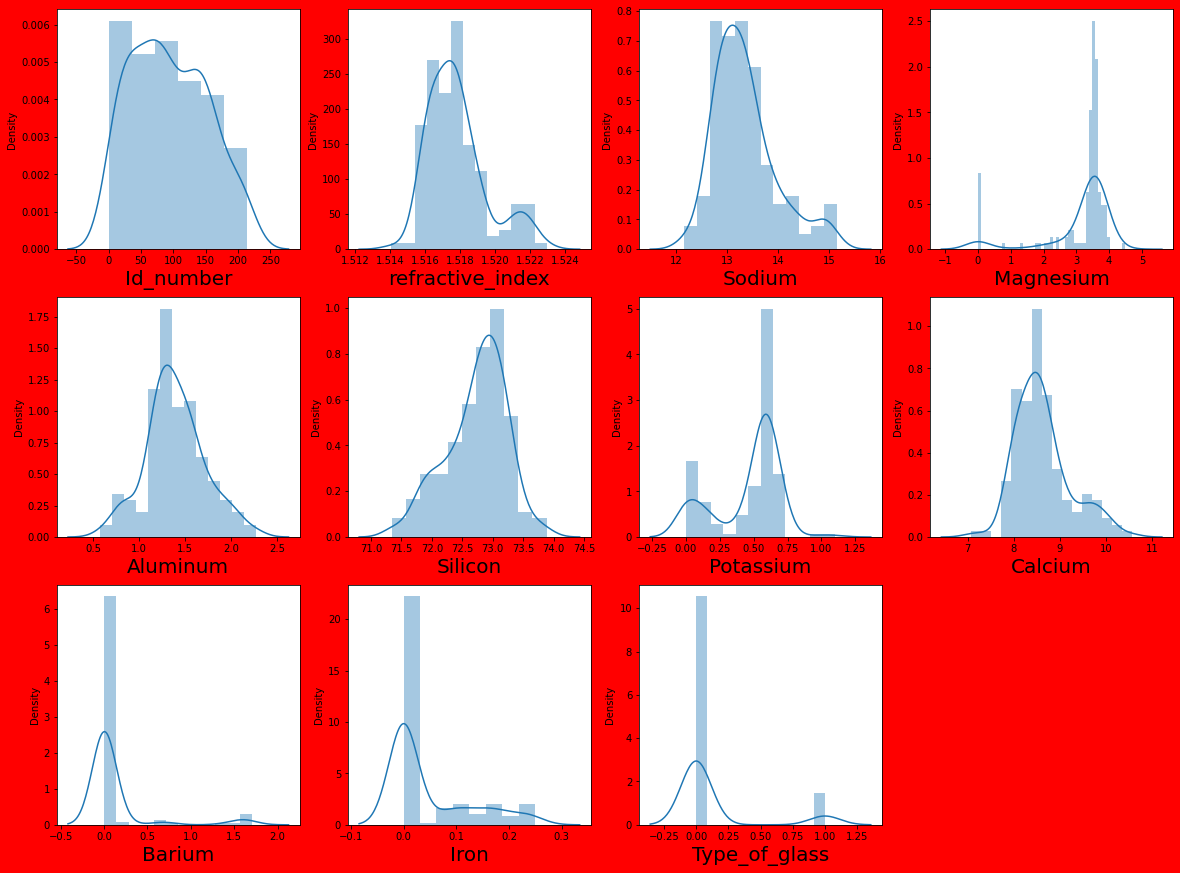

In [167]:
# see or visuvalize in graph
plt.figure(figsize=(20,15) , facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize = 20)
    plotnumber += 1
plt.show()

In [168]:
#skewness in terms of number
X.skew().sort_values(ascending=False)

Potassium           6.551648
Barium              3.416425
Calcium             2.047054
Iron                1.754327
refractive_index    1.625431
Aluminum            0.907290
Sodium              0.454181
Id_number           0.000000
Silicon            -0.730447
Magnesium          -1.152559
dtype: float64

#### Appling Power Transformation method

In [169]:
#applying Power Transformation beacuse our dataset is small and we want to keep outlier
from sklearn.preprocessing import power_transform , PowerTransformer
pt=PowerTransformer()

In [170]:
#transformed data
X_scaled=pt.fit_transform(X)
X_scaled

array([[-2.08369910e+00,  7.28583860e-17,  3.17060798e-01, ...,
        -1.06541145e-02, -4.54889520e-01, -6.80014920e-01],
       [-2.03941061e+00, -2.08166817e-17,  6.16576805e-01, ...,
        -8.84531906e-01, -4.54889520e-01, -6.80014920e-01],
       [-1.99917168e+00, -5.89805982e-17,  1.83344458e-01, ...,
        -9.38250766e-01, -4.54889520e-01, -6.80014920e-01],
       ...,
       [ 1.53407895e+00,  6.59194921e-17,  1.16383548e+00, ...,
        -2.82733025e-01,  2.37684792e+00, -6.80014920e-01],
       [ 1.54671746e+00, -4.85722573e-17,  1.18668078e+00, ...,
        -2.46445831e-01,  2.37663774e+00, -6.80014920e-01],
       [ 1.55933935e+00, -3.46944695e-17,  1.01447527e+00, ...,
        -1.22236162e-01,  2.37692310e+00, -6.80014920e-01]])

In [171]:
#again checking the skewness
pd.DataFrame(X_scaled,columns=X.columns).skew().sort_values(ascending=False)

Barium              1.824175
Iron                0.858508
Silicon             0.130384
Aluminum            0.000219
refractive_index    0.000000
Sodium             -0.008973
Potassium          -0.071816
Calcium            -0.209314
Id_number          -0.269261
Magnesium          -0.889528
dtype: float64

In [172]:
#we will convert numpy array into dataframe
X_new=pd.DataFrame(X_scaled,columns=X.columns)

In [173]:
X_new.skew().sort_values(ascending=False)

Barium              1.824175
Iron                0.858508
Silicon             0.130384
Aluminum            0.000219
refractive_index    0.000000
Sodium             -0.008973
Potassium          -0.071816
Calcium            -0.209314
Id_number          -0.269261
Magnesium          -0.889528
dtype: float64

### Once agian Seeing the Distribution of the Data after applying Power Transformation

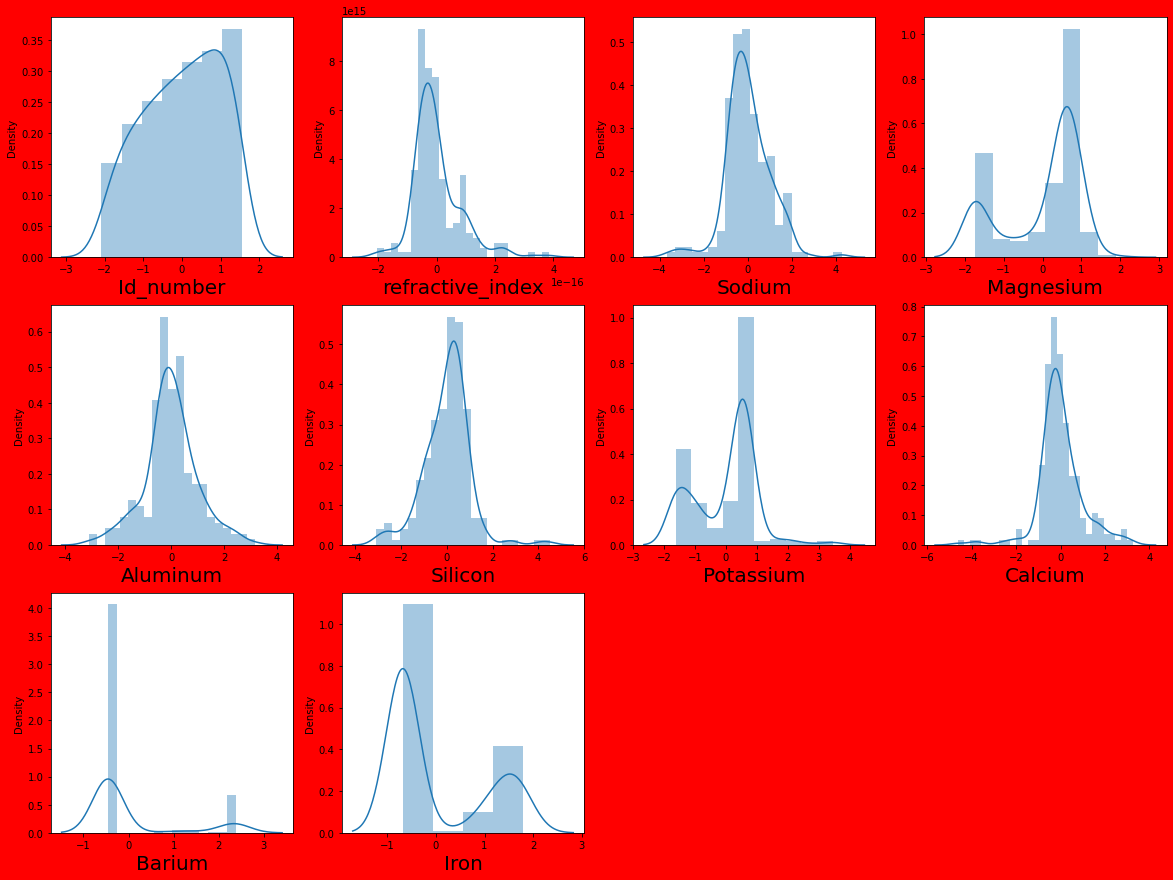

In [174]:
# see or visuvalize in graph
plt.figure(figsize=(20,15) , facecolor = 'red')
plotnumber = 1

for column in X_new:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(X_new[column])
        plt.xlabel(column , fontsize = 20)
    plotnumber += 1
plt.show()

## Seeing if there are any Multicollinearity By using VIF

In [175]:
# now we check for multicolinearity using VIF

vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.886419,Id_number
1,6.365948,refractive_index
2,3.314058,Sodium
3,4.441856,Magnesium
4,2.413504,Aluminum
5,1.643105,Silicon
6,4.018943,Potassium
7,5.425439,Calcium
8,2.625650,Barium
9,1.092353,Iron


#### Droppoing Calcium column because as we see in heatmap we saw more relation between them and calcium contribute less to our label so Dropping Calcium Column

In [176]:
X_new.drop(['Calcium','Id_number'] , axis=1 , inplace=True)

### Finding Best Random State

In [177]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_new,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train_ns,y_train_ns)
    
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9629629629629629 RandomState 1


MAXINING TESTING SCORE 0.9629629629629629 ON RANDOM STATE OF 1
Testing Accuracy 0.8703703703703703 RandomState 2


Testing Accuracy 0.9259259259259259 RandomState 3


Testing Accuracy 0.9444444444444444 RandomState 4


Testing Accuracy 0.9444444444444444 RandomState 5


Testing Accuracy 0.9629629629629629 RandomState 6


Testing Accuracy 0.9444444444444444 RandomState 7


Testing Accuracy 0.9444444444444444 RandomState 8


Testing Accuracy 0.9629629629629629 RandomState 9


Testing Accuracy 0.9259259259259259 RandomState 10


Testing Accuracy 0.9259259259259259 RandomState 11


Testing Accuracy 0.8888888888888888 RandomState 12


Testing Accuracy 0.9629629629629629 RandomState 13


Testing Accuracy 0.8888888888888888 RandomState 14


Testing Accuracy 0.9444444444444444 RandomState 15


Testing Accuracy 0.9074074074074074 RandomState 16


Testing Accuracy 0.9814814814814815 RandomState 17


MAXINING TESTING SCORE 0.9814814814814815 ON 

In [178]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  1.0 On Random State 41


### Training the model

In [179]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_new,y,test_size=0.25,random_state=44)

In [180]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [181]:
# model initilization
clf_lr = LogisticRegression()
clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [182]:
# call the function
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.625000%
====Testing Score====
Accuracy score : 100.000000%

 
 Classification report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Model Scores 
* Training Score = 95.625000%
* Testing Score = 100.000000%

## Hyperparameter For Logistic Regression

In [183]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_new, y)

In [184]:
print (grid_result.best_params_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [185]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=1.0,penalty='none',solver='newton-cg')
clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression(penalty='none', solver='newton-cg')

In [186]:
# call the function
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 96.250000%
====Testing Score====
Accuracy score : 100.000000%

 
 Classification report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Model Scores With Hyperparameter Tuning
* Training Score = 96.250000%
* Testing Score = 100.000000%

# DecisionTreeClassifier

In [187]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#### Finding best Random State

In [188]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 1.0 RandomState 1


MAXINING TESTING SCORE 1.0 ON RANDOM STATE OF 1
Testing Accuracy 1.0 RandomState 2


Testing Accuracy 1.0 RandomState 3


Testing Accuracy 0.9814814814814815 RandomState 4


Testing Accuracy 1.0 RandomState 5


Testing Accuracy 1.0 RandomState 6


Testing Accuracy 0.9814814814814815 RandomState 7


Testing Accuracy 0.9814814814814815 RandomState 8


Testing Accuracy 1.0 RandomState 9


Testing Accuracy 1.0 RandomState 10


Testing Accuracy 1.0 RandomState 11


Testing Accuracy 1.0 RandomState 12


Testing Accuracy 1.0 RandomState 13


Testing Accuracy 0.9814814814814815 RandomState 14


Testing Accuracy 1.0 RandomState 15


Testing Accuracy 0.9814814814814815 RandomState 16


Testing Accuracy 1.0 RandomState 17


Testing Accuracy 1.0 RandomState 18


Testing Accuracy 0.9814814814814815 RandomState 19


Testing Accuracy 0.9814814814814815 RandomState 20


Testing Accuracy 1.0 RandomState 21


Testing Accuracy 1.0 RandomState 22


Testing Accuracy 1.0

### Model Training

In [189]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [190]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [191]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [192]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 98.148148%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.98        54
weighted avg       0.98      0.98      0.98        54



##  Model Scores 
* Training Score = 100.000000%
* Testing Score = 98.148148%

## Hyperparameter For Decision Tree

In [193]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [194]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [195]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [196]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [261]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 1, min_samples_leaf= 2, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)


DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=5)

In [262]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 98.148148%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.98        54
weighted avg       0.98      0.98      0.98        54



## Model Scores With Hyperparameter Tuning
* Training Score = 100.000000%
* Testing Score = 98.148148%

## Confusion Matrix for Decision Tree

In [199]:
y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[40,  0],
       [ 1, 13]], dtype=int64)

# RandomForestClassifier

In [200]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Finding best Random State

In [201]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 1.0 RandomState 1


MAXINING TESTING SCORE 1.0 ON RANDOM STATE OF 1
Testing Accuracy 1.0 RandomState 2


Testing Accuracy 1.0 RandomState 3


Testing Accuracy 0.9814814814814815 RandomState 4


Testing Accuracy 1.0 RandomState 5


Testing Accuracy 1.0 RandomState 6


Testing Accuracy 1.0 RandomState 7


Testing Accuracy 1.0 RandomState 8


Testing Accuracy 1.0 RandomState 9


Testing Accuracy 1.0 RandomState 10


Testing Accuracy 1.0 RandomState 11


Testing Accuracy 1.0 RandomState 12


Testing Accuracy 1.0 RandomState 13


Testing Accuracy 0.9814814814814815 RandomState 14


Testing Accuracy 1.0 RandomState 15


Testing Accuracy 1.0 RandomState 16


Testing Accuracy 1.0 RandomState 17


Testing Accuracy 1.0 RandomState 18


Testing Accuracy 0.9814814814814815 RandomState 19


Testing Accuracy 1.0 RandomState 20


Testing Accuracy 1.0 RandomState 21


Testing Accuracy 1.0 RandomState 22


Testing Accuracy 1.0 RandomState 23


Testing Accuracy 1.0 RandomState 24


Test

### Training the Model

In [202]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [203]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [204]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [205]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 98.148148%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.98        54
weighted avg       0.98      0.98      0.98        54



## ##  Model Scores 
* Training Score = 100.000000%
* Testing Score = 98.148148%

## Hyperparameter Tuning for Random Forest

In [206]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [207]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [208]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [209]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 2}


In [210]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 2, min_samples_leaf= 2, min_samples_split= 5,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=4)

In [211]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 92.592593%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.71      0.83        14

    accuracy                           0.93        54
   macro avg       0.95      0.86      0.89        54
weighted avg       0.93      0.93      0.92        54



## ## Model Scores With Hyperparameter Tuning
* Training Score = 100.000000%
* Testing Score = 92.592593%

## Confusion Matrix for Random forest

In [212]:
y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[40,  0],
       [ 1, 13]], dtype=int64)

# KNeighborsClassifier Model

In [213]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Finding Best Random State

In [214]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 1.0 RandomState 1


MAXINING TESTING SCORE 1.0 ON RANDOM STATE OF 1
Testing Accuracy 0.9629629629629629 RandomState 2


Testing Accuracy 0.9629629629629629 RandomState 3


Testing Accuracy 0.9629629629629629 RandomState 4


Testing Accuracy 0.9814814814814815 RandomState 5


Testing Accuracy 1.0 RandomState 6


Testing Accuracy 1.0 RandomState 7


Testing Accuracy 0.9814814814814815 RandomState 8


Testing Accuracy 0.9629629629629629 RandomState 9


Testing Accuracy 0.9629629629629629 RandomState 10


Testing Accuracy 0.9814814814814815 RandomState 11


Testing Accuracy 0.9629629629629629 RandomState 12


Testing Accuracy 0.9814814814814815 RandomState 13


Testing Accuracy 0.9259259259259259 RandomState 14


Testing Accuracy 0.9814814814814815 RandomState 15


Testing Accuracy 0.9444444444444444 RandomState 16


Testing Accuracy 1.0 RandomState 17


Testing Accuracy 0.9629629629629629 RandomState 18


Testing Accuracy 0.9814814814814815 RandomState 19


Testing Accura

### Training the model

In [215]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [216]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [217]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier()

In [218]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 98.148148%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.98        54
weighted avg       0.98      0.98      0.98        54



## ##  Model Scores 
* Training Score = 100.000000%
* Testing Score = 98.148148%

## Hyperparameter Tuning for KNNeighbors Classifier

In [219]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [220]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [221]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [222]:
#see the best paramater

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [223]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [224]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 99.375000%
====Testing Score====
Accuracy score : 98.148148%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.98        54
weighted avg       0.98      0.98      0.98        54



## Model Scores With Hyperparameter Tuning
* Training Score = 99.375000%
* Testing Score = 98.148148%

## confusion matrix for knn

In [225]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[40,  0],
       [ 1, 13]], dtype=int64)

#  PLOT AUC-ROC CURVE

## auc-roc curve for without hyperparameter tuning

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [227]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [248]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [249]:
lr.fit(X_train_ns,y_train_ns)
dt.fit(X_train_ns,y_train_ns)
rf.fit(X_train_ns,y_train_ns)
knn.fit(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


In [250]:
lr.score(X_train_ns,y_train_ns)
dt.score(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


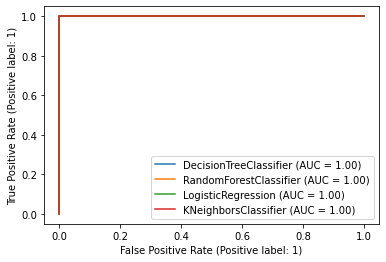

In [251]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

# how well our model works on training data 

disp = plot_roc_curve(dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(lr,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


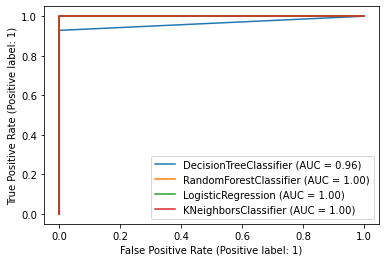

In [252]:
# how well our model works on testing data 

disp = plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## auc-roc curve with hyperparameter tuning

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [265]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [266]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [267]:
# hyperparameter for logistic regression

lr=LogisticRegression(C=1.0,penalty='none',solver='newton-cg')
lr.fit(X_train_ns,y_train_ns)


LogisticRegression(penalty='none', solver='newton-cg')

In [268]:
# hyperparameter for decision tree

dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 1, min_samples_leaf= 2, min_samples_split= 5)
dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=5)

In [269]:
# hyperparameter for random forest

rf=RandomForestClassifier(criterion= 'entropy', max_depth = 2, min_samples_leaf= 2, min_samples_split= 5,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=4)

In [270]:
# hyperparameter for Knn Model

knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [271]:
dt.score(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
lr.score(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


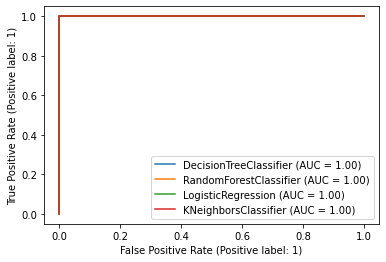

In [272]:
# how well our model works on training data 

disp = plot_roc_curve(dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(lr,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


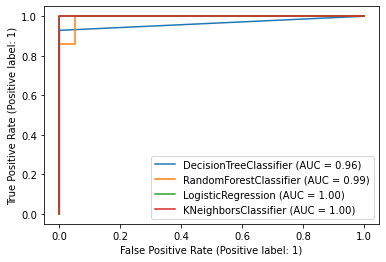

In [273]:
# how well our model works on testing data 

disp = plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()